# Visualize output
    -Author: GEOframe group
    -License: this work is licensed under a Creative Commons Attribution-NonCommercial 4.0 International License
-----


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
from matplotlib import rc
import matplotlib.style as style 
%matplotlib inline

import math
import xarray as xr

import warnings
warnings.filterwarnings('ignore')

style.available
style.use('seaborn-whitegrid')

nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 12,
        "font.size": 12,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 10,
        "xtick.labelsize": 10,
        "ytick.labelsize": 10,
}

plt.rcParams.update(nice_fonts)


my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
project_path = os.path.dirname(os.getcwd())

## Read the output file

In [3]:
os.chdir(project_path+'/output')
os.listdir()

['ex00_0000.nc',
 'ex00_canc_0000.nc',
 'ex00_Idrologia2305_0000.nc',
 'ex01_0000.nc',
 'ex02_0000.nc',
 'ex02_new_0000.nc',
 'ex03_dry_0000.nc',
 'ex03_wet_0000.nc',
 'ex04_0000.nc',
 'ex04_deep_0000.nc',
 'ex05_15C_0000.nc',
 'ex05_30C_0000.nc',
 'ex05_5C_0000.nc',
 'ex06_0000.nc',
 'ex06_calibrated_0000.nc',
 'ex06_simulated_psi.csv',
 'ex06_simulated_theta.csv',
 'ex07_0000.nc',
 'ex07_simulated_psi.csv',
 'ex07_simulated_theta.csv',
 'ex08_0000.nc',
 'Integrate PDE',
 'richardsCalib']

In [3]:
ds = xr.open_dataset("ex08_0000.nc")
ds.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:           (depth: 56, dualDepth: 56, time: 1417)
Coordinates:
  * depth             (depth) float64 -1.995 -1.982 -1.964 ... -0.005 0.0
  * dualDepth         (dualDepth) float64 -2.0 -1.99 -1.975 ... -0.025 -0.01 0.0
  * time              (time) datetime64[ns] 2003-01-01 ... 2003-03-01
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex07.
    Top_boundary_condition:        

## 2D plot

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.plot(ax=ax, y='depth', cmap='Blues')

# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 432x266.996 with 2 Axes>

## 1D plot

### Vertical profile

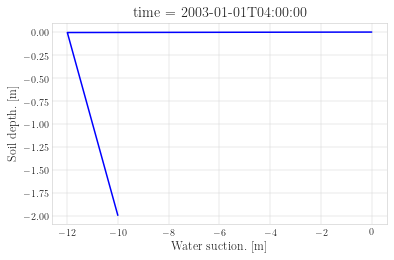

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.sel(time='2003-01-01 04:00').plot(ax=ax, y='depth', color='blue')

# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

plt.show()

### Time evolution at a specific depth

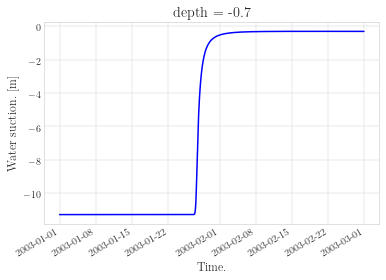

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6,6/1.618))

ds.psi.sel(depth=-0.7, method='nearest').plot(ax=ax, color='blue')

# ax.set_title('text')
# ax.set_ylabel('text')
# ax.set_xlabel('text')

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_tick_params(rotation=45)

plt.show()

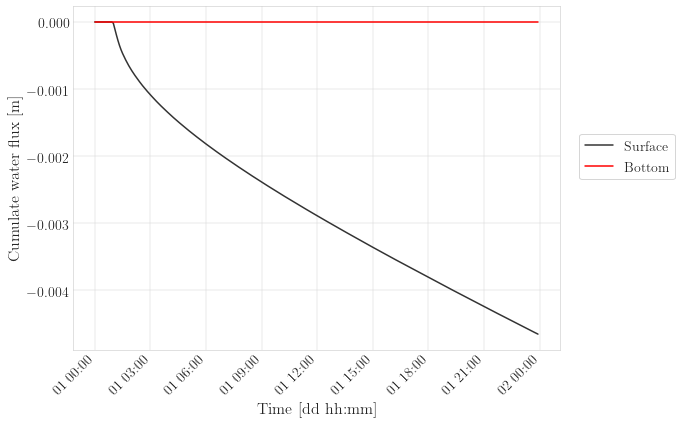

In [36]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10/1.618)) 

(ds.darcyVelocity.sel(dualDepth=0, method='nearest')*60).cumsum().plot(ax=ax, label='Surface', color='0.2')
(ds.darcyVelocity.sel(dualDepth=-2, method='nearest')*60).cumsum().plot(ax=ax, label='Bottom', color='red')


ax.set_title('')

ax.set_ylabel('Cumulate water flux [m]')

ax.set_xlabel('Time [dd hh:mm]')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

ax.legend(bbox_to_anchor=(1.25,0.65), ncol=1)

plt.tight_layout()
plt.show()